# Part I

In [1]:
# import packages
import numpy as np
import simpleaudio as sa
import matplotlib.pyplot as plt
from scipy import signal # built-in spectrogram for reference
from matplotlib.animation import FuncAnimation

In [176]:
%matplotlib notebook
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


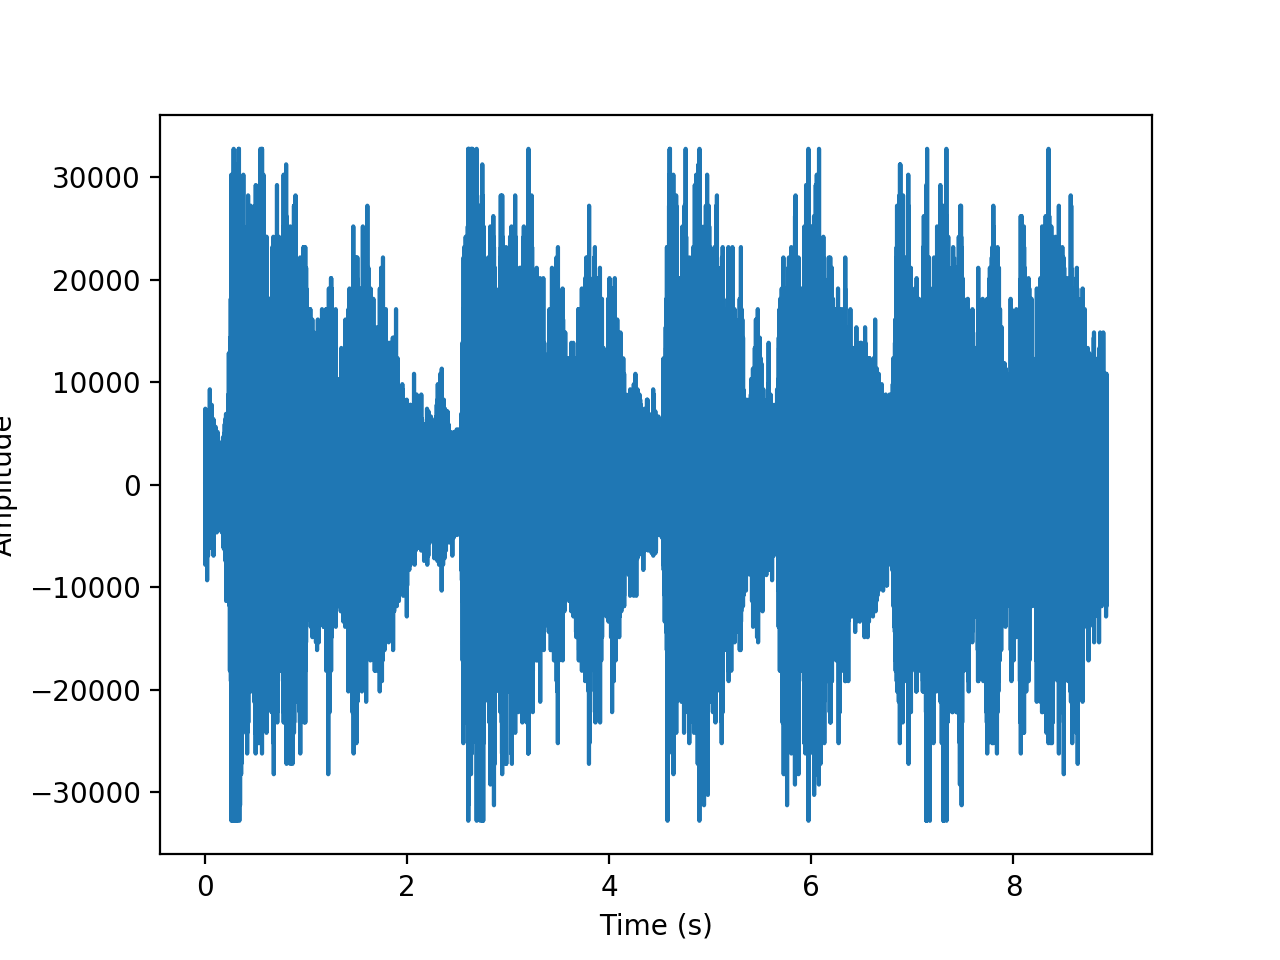

In [233]:
# load handel
y = np.load('y.npy')
y *= 32767/max(abs(y))
y = y.astype(np.int16)

# play handel
play_obj = sa.play_buffer(y, 1, 2, 8000)

# plot handel: amplitude vs time
Fs = np.load('Fs.npy') # rescale factor
n = y.size # number of grid points
t = np.arange(1, n+1)/Fs # rescale frame to time
plt.figure(1)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
#plt.title('Sound amplitude of Handel')
plt.show()

<IPython.core.display.Javascript object>


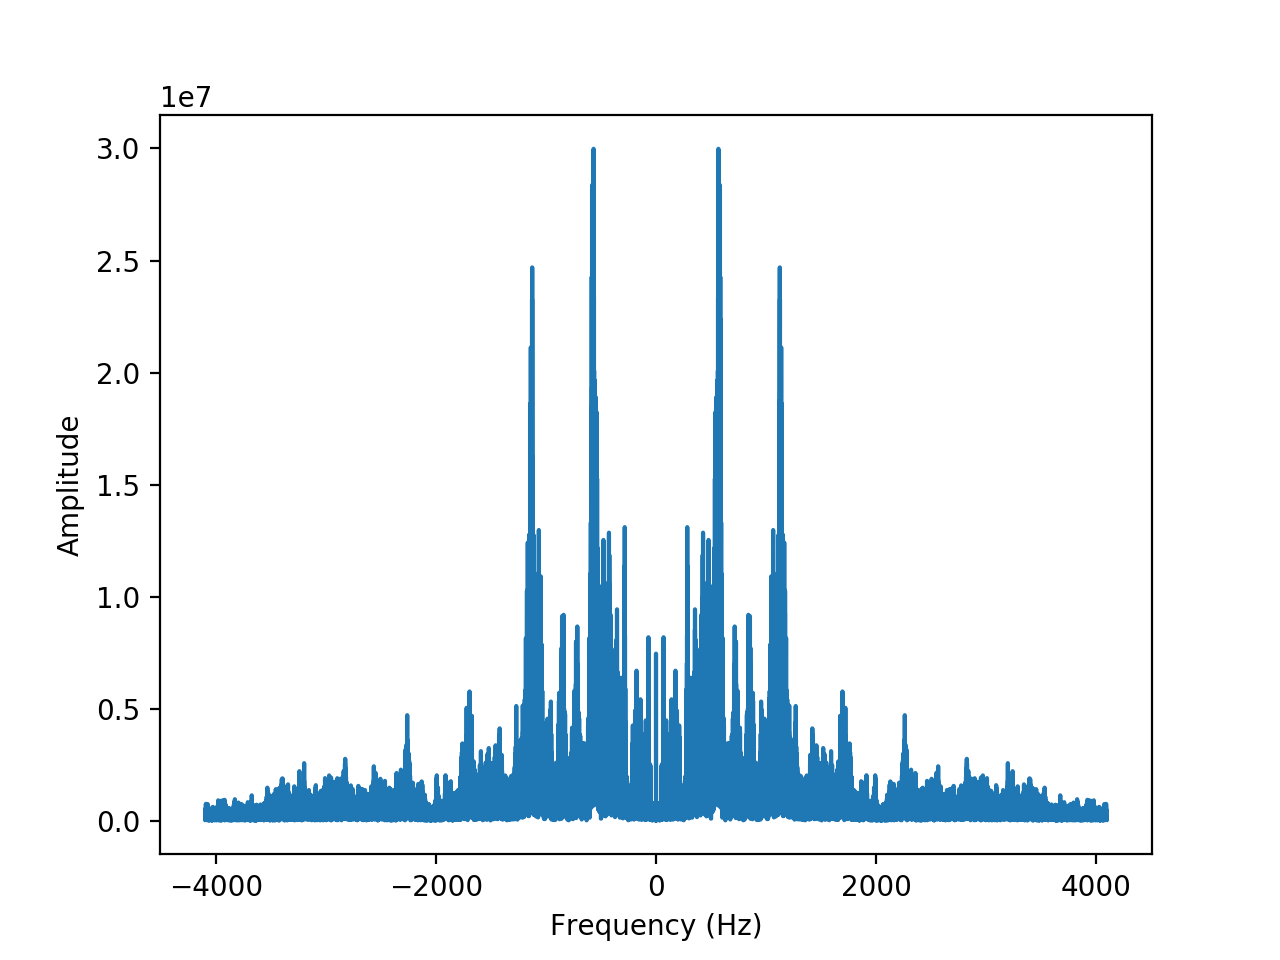

In [351]:
# Fourier modes
T = t[-1] # period of our "periodic" data, use n since there's no point t = 0.
f = (1.0/T)*np.concatenate((np.arange(0, n/2), np.arange(-(n-1)/2, 0))) # frequency
fs = np.fft.fftshift(f)

# Fourier Transform
yft = np.fft.fft(y)
yfts = np.fft.fftshift(yft)
plt.figure(2)
plt.plot(fs, abs(yfts))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
#plt.title('Fourier Transform of Handel')
plt.show()

In [129]:
# Gabor Transform
def gabor_transform(data, frames, window_func, window_num = 20, pplot = False, ffilter = False):
    
    '''
    This function performs Gabor Transform on the data and return horizontal axis, vertical axis and the spectrogram
    data: time series
    frames: Number of frames per second
    window_num: number of window specified
    plot: plotting the process (default = False)
    window_func: function for windowing the data
    ffilter: filter out secondary peaks (overtones) (default = False)
    '''
    
    # time
    n = data.size # number of grid points
    t = np.arange(1, n+1)/frames # rescale frame to time
    tmax = t[-1]
    tmin = 0
    tslide = np.linspace(tmin, tmax, window_num) # window slide
    n2 = int((n+1)/2) # number of absolute points
    spc2 = np.zeros((window_num, int((n+1)/2))) # spectrogram with absolute frequency
    
    # vertical axis
    f = (1.0/tmax)*np.concatenate((np.arange(0, n/2), np.arange(-(n-1)/2, 0))) # frequency
    fs = np.fft.fftshift(f)
    fs2 = fs[(n2-1)::]
    
    if pplot:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
        plt.show()  
    
    for j in range(window_num):
        
        tnow = tslide[j]
        # filter
        g = window_func(t, tnow)
        
        # Gabor Transform
        yg = data * g
        ygt = np.fft.fft(yg)
        ygts = np.fft.fftshift(ygt)
        
        # filter
        if ffilter:
            idx_peak = ygts.argmax()
            fs0 = fs[idx_peak]
            filter_width = 10
            filter_func = np.exp( -(fs - fs0)**2 / (2*filter_width**2) )
            ygts = ygts * filter_func
        
        # save the frequency distribution in spectrogram
        ygtsflip = np.flip(ygts)
        spc2[j] = abs(ygts[0:n2] + ygtsflip[0:n2])
        spc2[j, n2-1] = spc2[j, n2-1]/2 # eliminate counting twice
        spc2[j] = np.flip(spc2[j])
        
        if pplot:
            fig1, = ax1.plot(t, data)
            fig2, = ax2.plot(t, yg)
            fig3, = ax3.plot(fs, abs(ygts))
            plt.pause(0.2)
        
    spc2 = spc2.transpose()
    
    return tslide, fs2, spc2

In [365]:
# window functions
width = 1 # window width
gaussian = lambda x, x0: np.exp( -(x - x0)**2 / (2*width**2) ) # Gaussian
mexican = lambda x, x0: (1 - (x - x0)**2 / (2*width**2) )*np.exp( -(x - x0)**2 / (2*width**2) ); # Mexican hat
shannon = lambda x, x0: 1 * (abs(x - x0) <= width); # Shannon function (step)

<IPython.core.display.Javascript object>


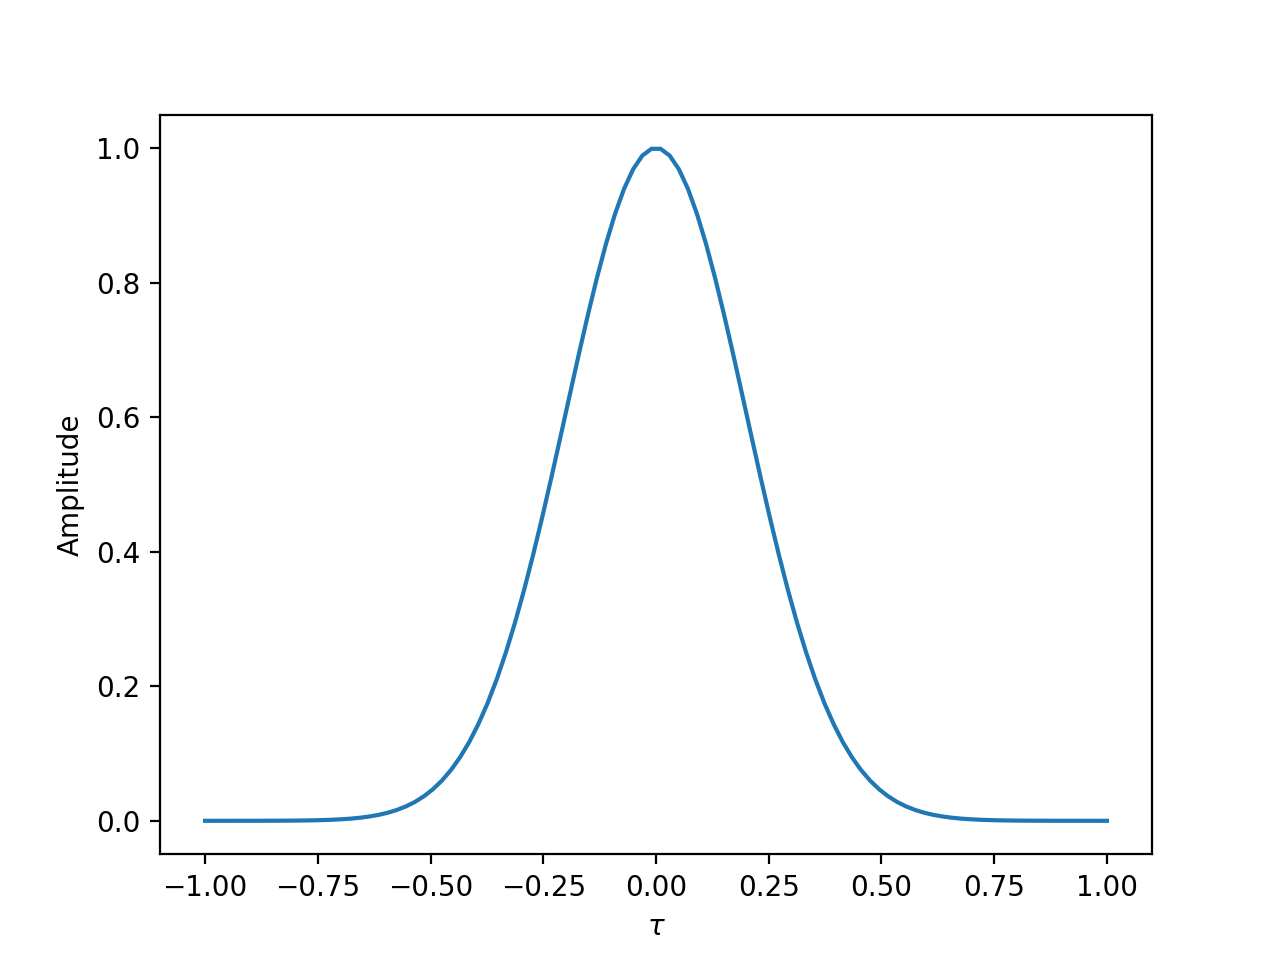

<IPython.core.display.Javascript object>


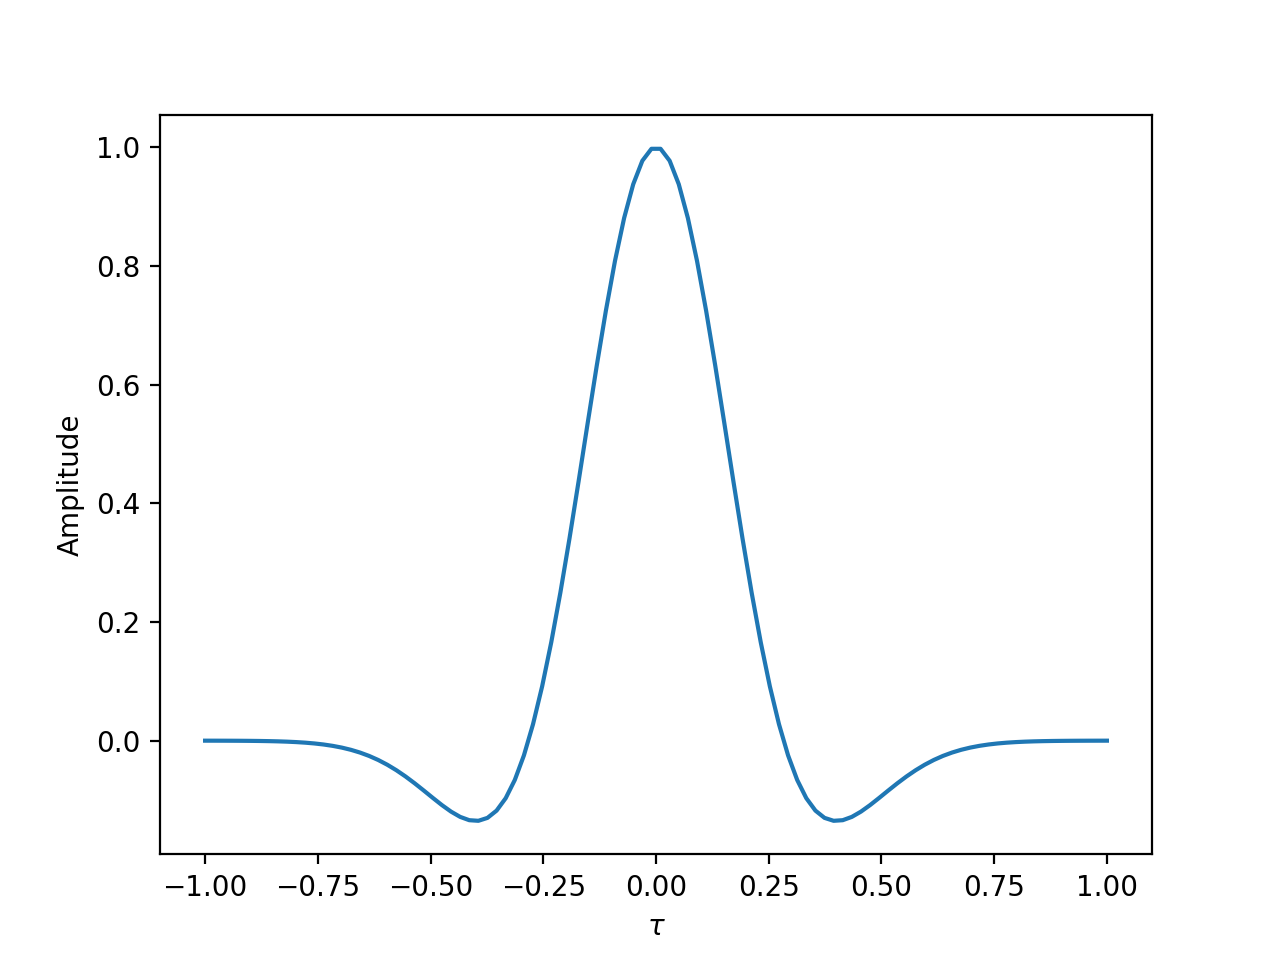

<IPython.core.display.Javascript object>


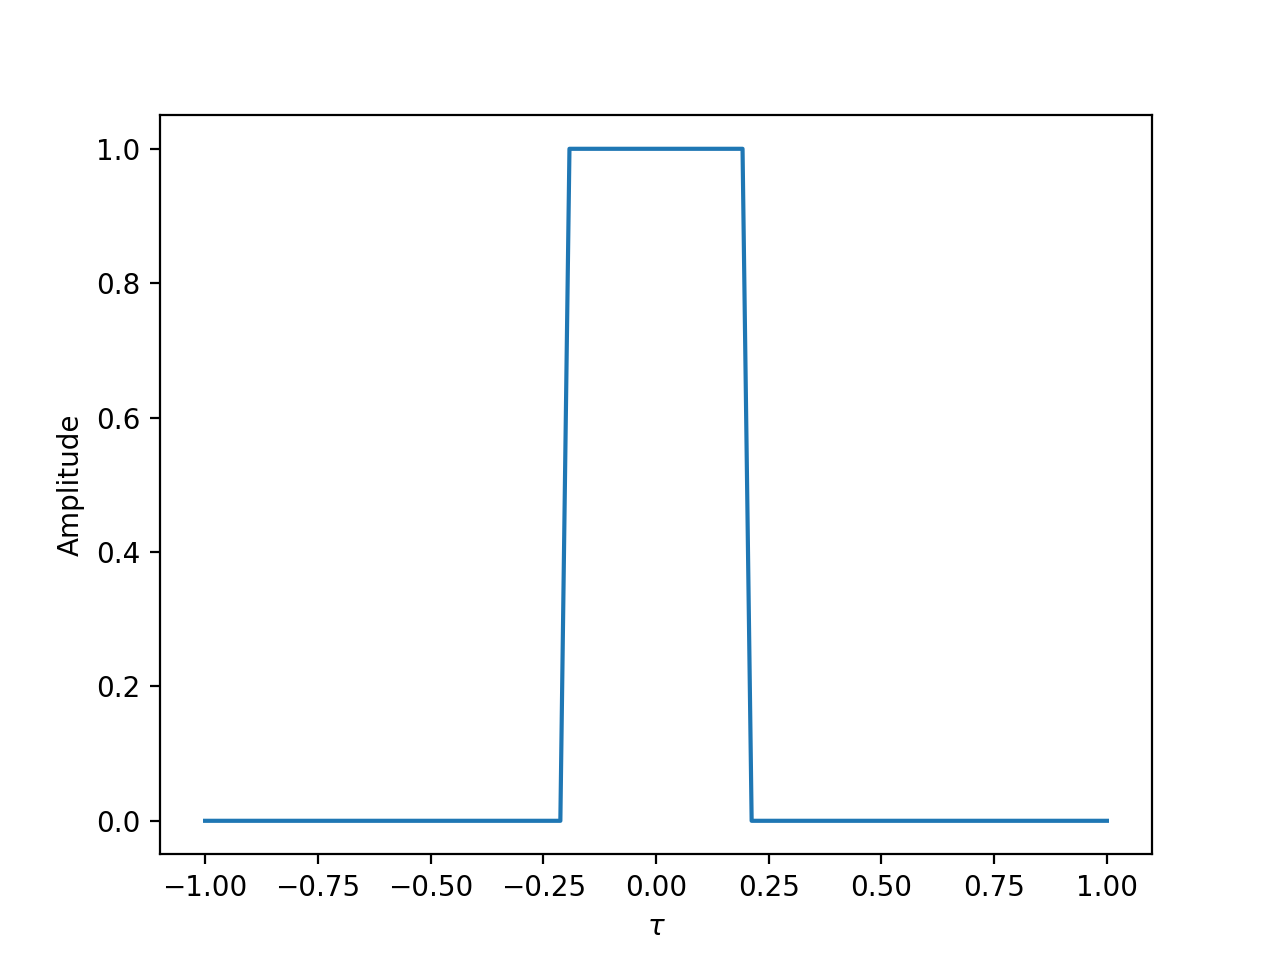

In [242]:
# plot three windows
x0 = 0
x = np.linspace(-1,1,100)
plt.figure(100)
plt.plot(x, gaussian(x, x0))
plt.xlabel("$\\tau$")
plt.ylabel("Amplitude")
plt.show()
plt.figure(101)
plt.plot(x, mexican(x, x0))
plt.xlabel("$\\tau$")
plt.ylabel("Amplitude")
plt.show()
plt.figure(102)
plt.plot(x, shannon(x, x0))
plt.xlabel("$\\tau$")
plt.ylabel("Amplitude")
plt.show()

<IPython.core.display.Javascript object>


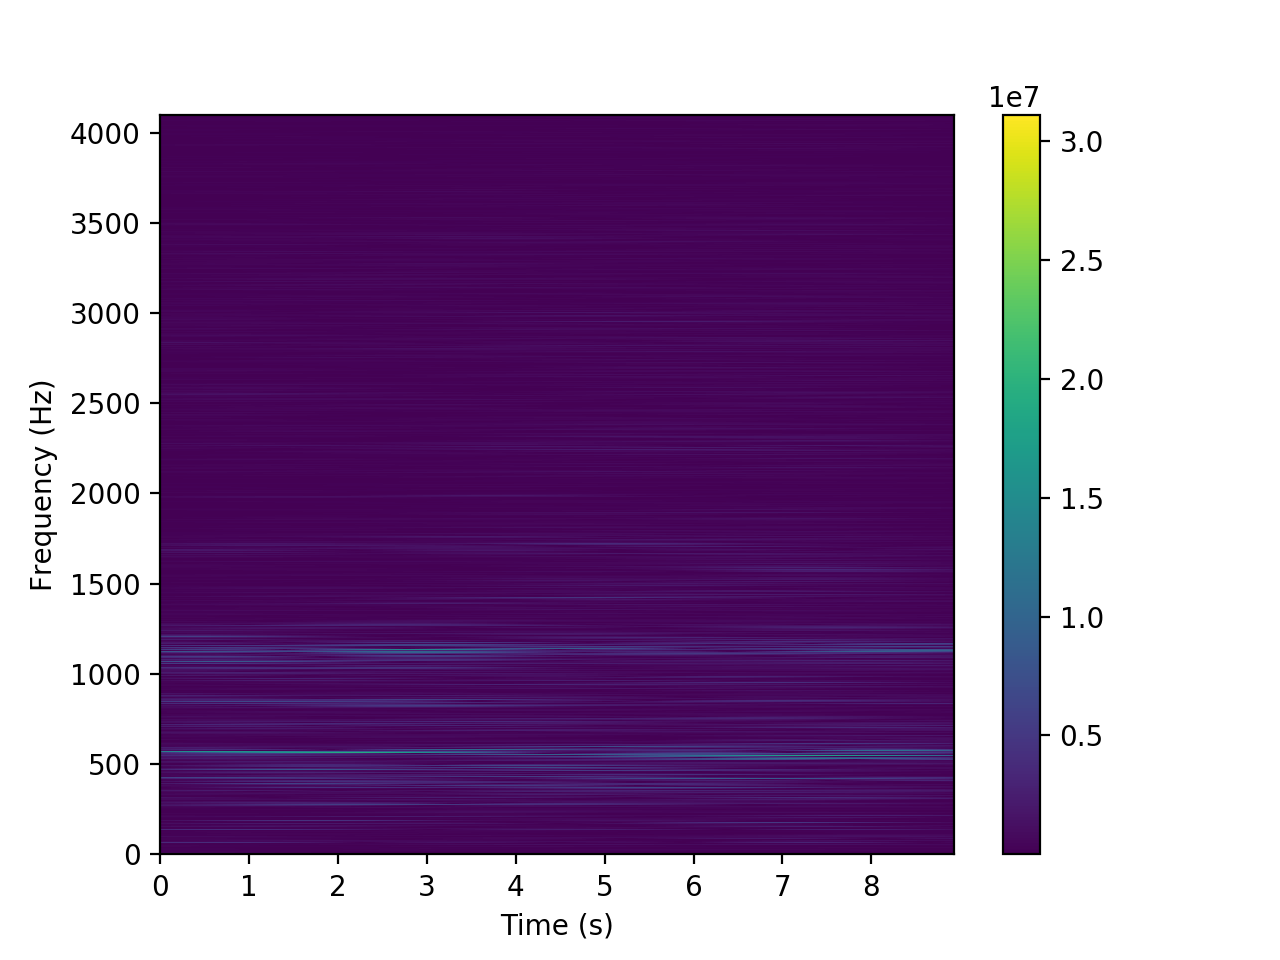

In [366]:
# gaussian wavelet
tg, fg, spc = gabor_transform(y, Fs, gaussian, window_num = 200)
plt.figure(4)
plt.pcolormesh(tg, fg, spc)
#plt.title('Spectrogram of Handel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


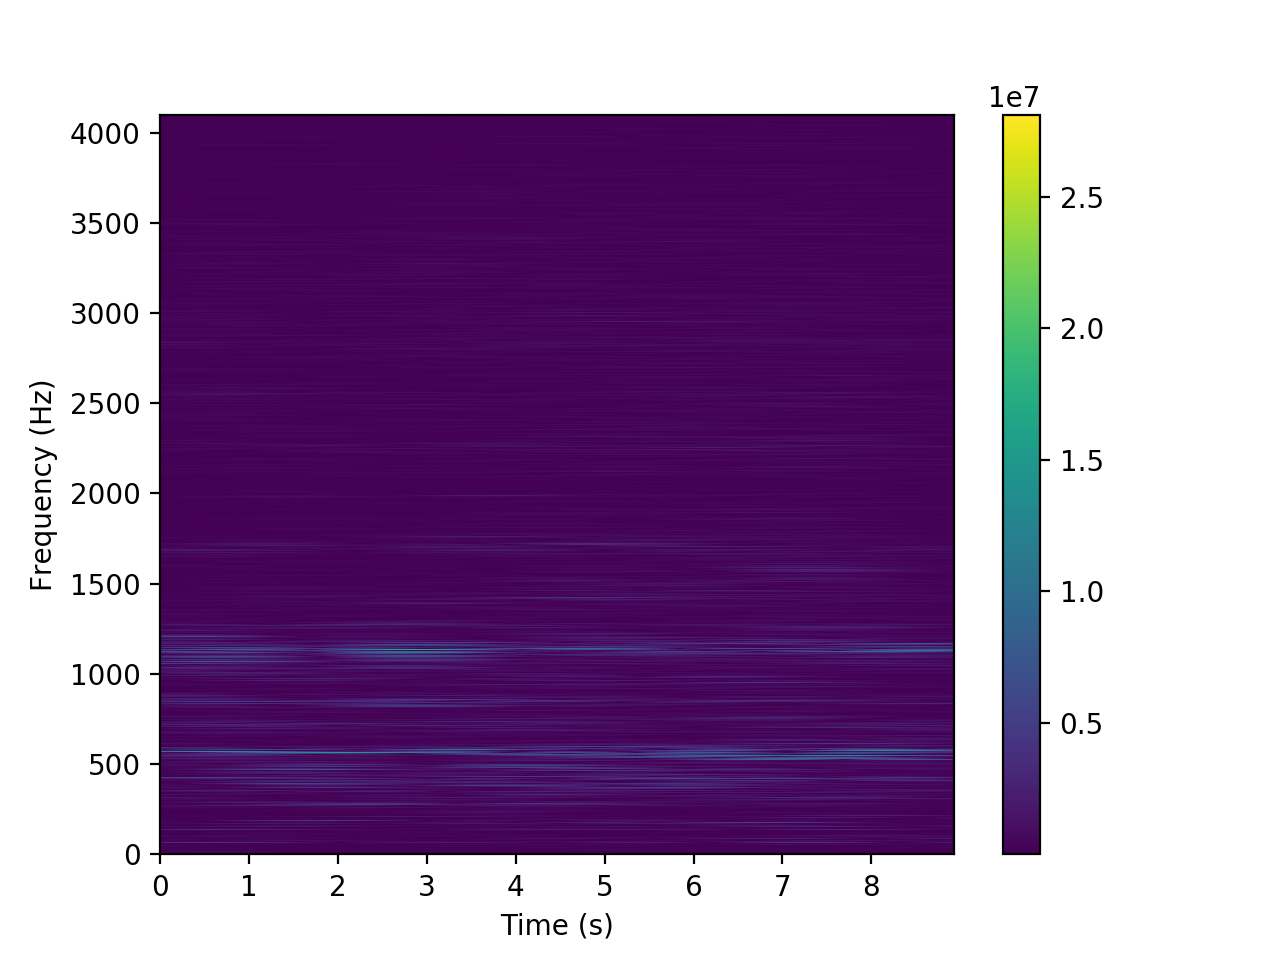

In [367]:
# mexican hat wavelet
tg, fg, spc = gabor_transform(y, Fs, mexican, window_num = 200)
plt.figure(5)
plt.pcolormesh(tg, fg, spc)
#plt.title('Spectrogram of Handel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


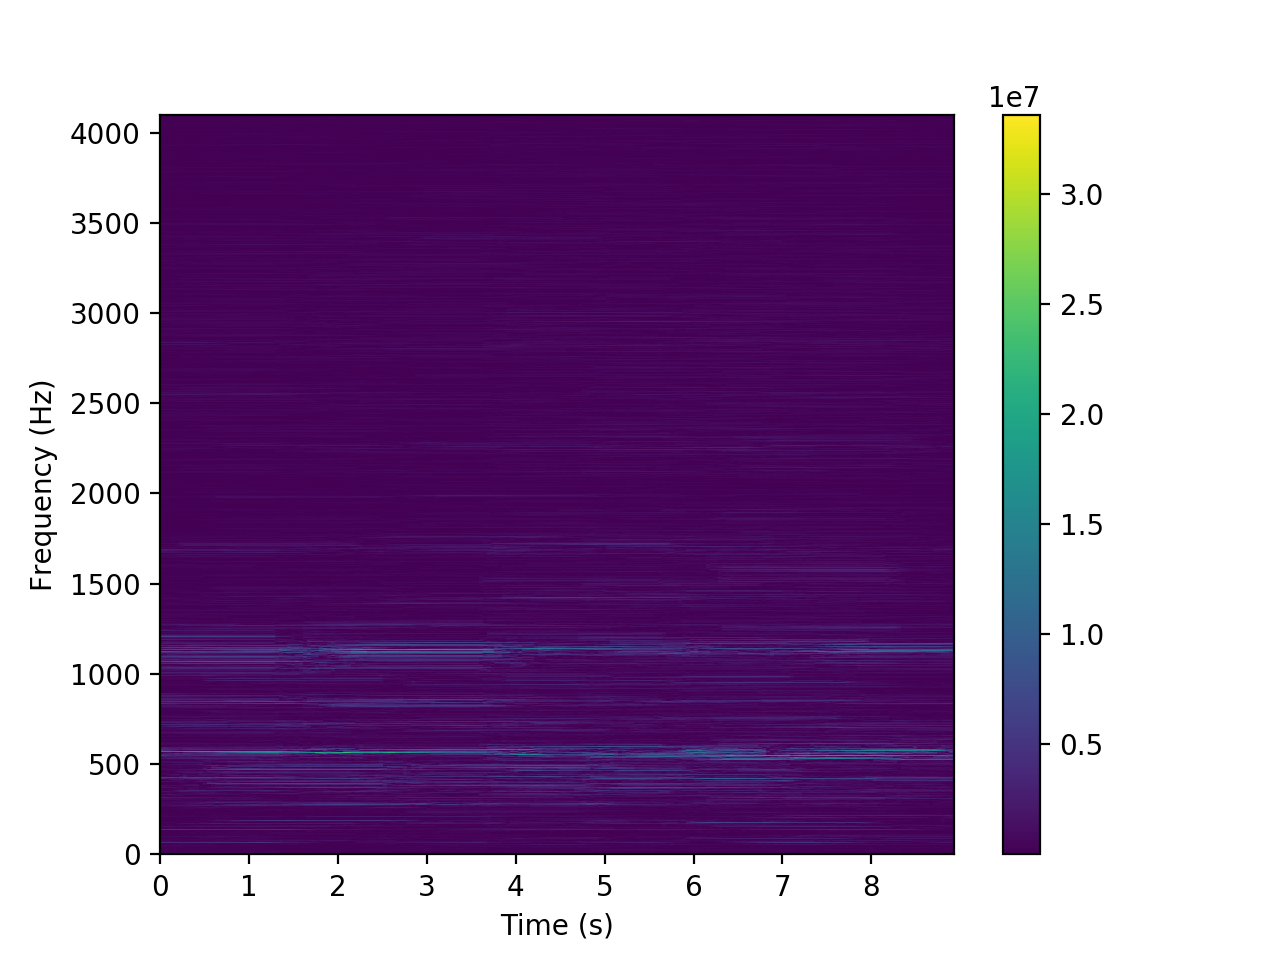

In [368]:
# shannon (step-like) wavelet
tg, fg, spc = gabor_transform(y, Fs, shannon, window_num = 200)
plt.figure(6)
plt.pcolormesh(tg, fg, spc)
#plt.title('Spectrogram of Handel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar()
plt.show()

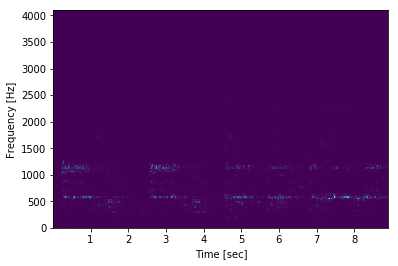

In [84]:
ftest, ttest, Sxxtest = signal.spectrogram(y, Fs)
plt.figure(7)
plt.pcolormesh(ttest, ftest, Sxxtest)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Part II

In [38]:
from scipy.io import wavfile

<IPython.core.display.Javascript object>


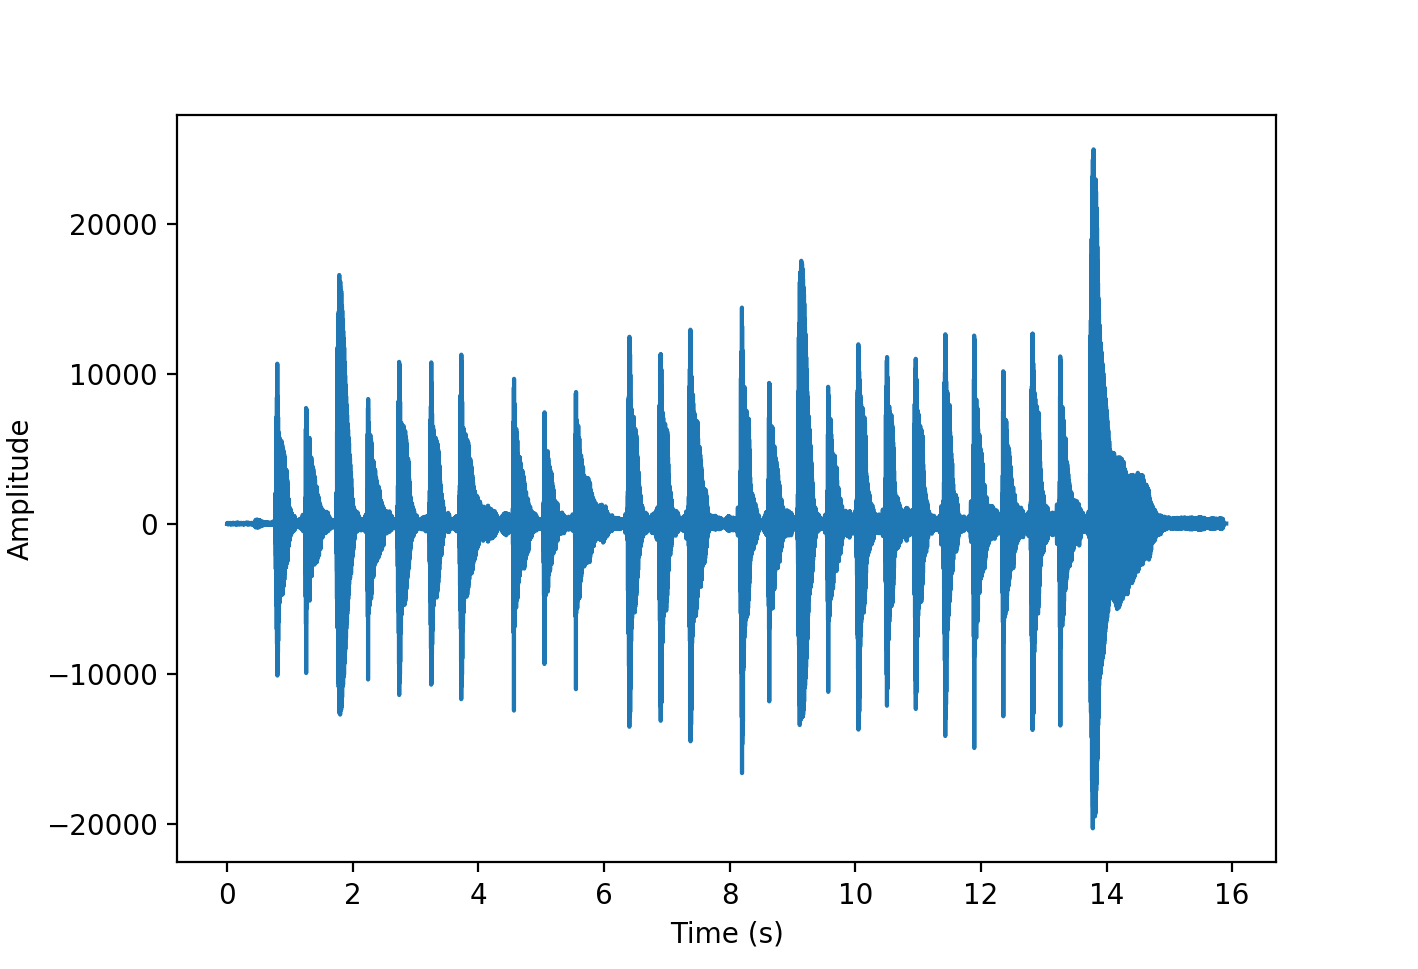

In [196]:
# music 1 - piano
tsm1 = 16; # record time in seconds
Fsm1, ym1 = wavfile.read("music1.wav")
nm1 = ym1.size
tm1 = np.arange(0, nm1)/Fsm1

# plot music 1
plt.figure(11)
plt.plot(tm1, ym1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# play music 1
play_m1 = sa.play_buffer(ym1, 1, 2, sample_rate = Fsm1)

<IPython.core.display.Javascript object>


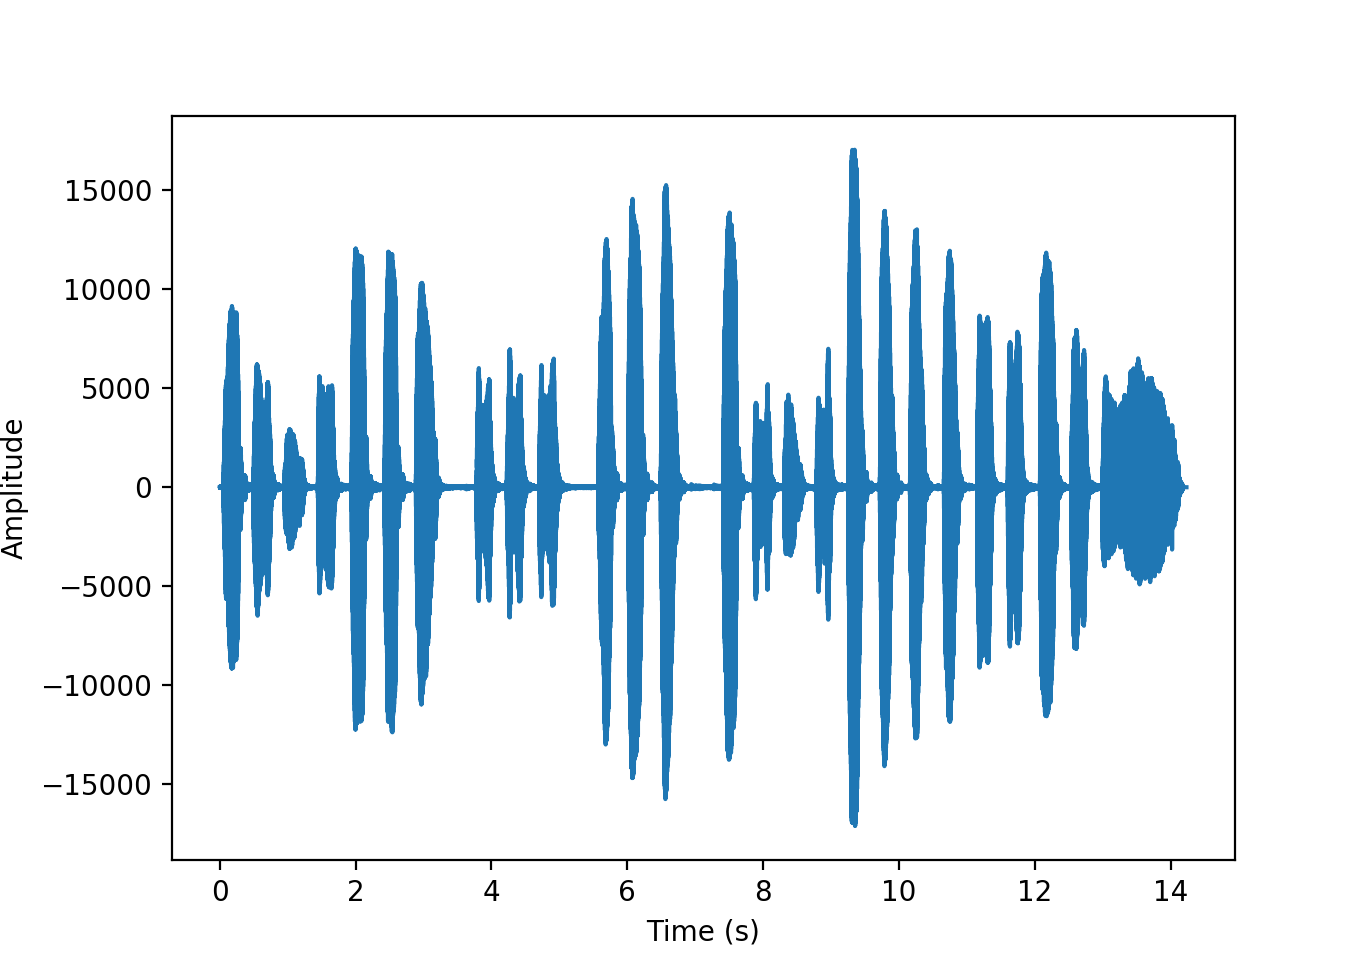

In [197]:
# music 2 - recorder
tsm2 = 14; # record time in seconds
Fsm2, ym2 = wavfile.read("music2.wav")
nm2 = ym2.size
tm2 = np.arange(0, nm2)/Fsm2

# plot music 2
plt.figure(12)
plt.plot(tm2, ym2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# play music 2
play_m2 = sa.play_buffer(ym2, 1, 2, sample_rate = Fsm2)

<IPython.core.display.Javascript object>


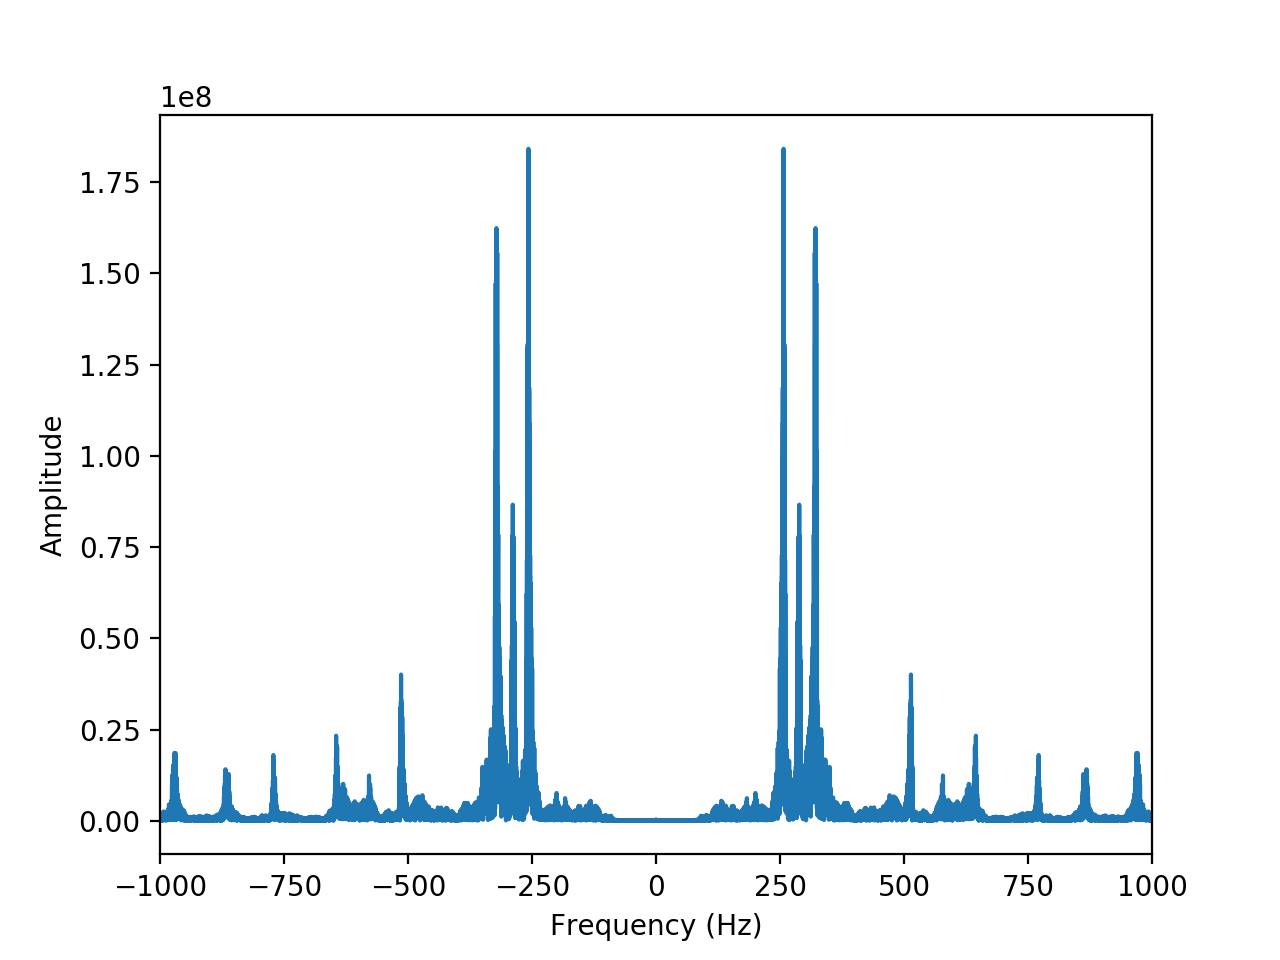

In [350]:
# Fourier modes
fm1 = (1.0/tm1[-1])*np.concatenate((np.arange(0, nm1/2), np.arange(-(nm1-1)/2, 0))) # frequency
fsm1 = np.fft.fftshift(fm1)

# Fourier Transform
ym1ft = np.fft.fft(ym1)
ym1fts = np.fft.fftshift(ym1ft)
plt.figure(13)
plt.plot(fsm1, abs(ym1fts))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim((-1000,1000))
plt.show()

<IPython.core.display.Javascript object>


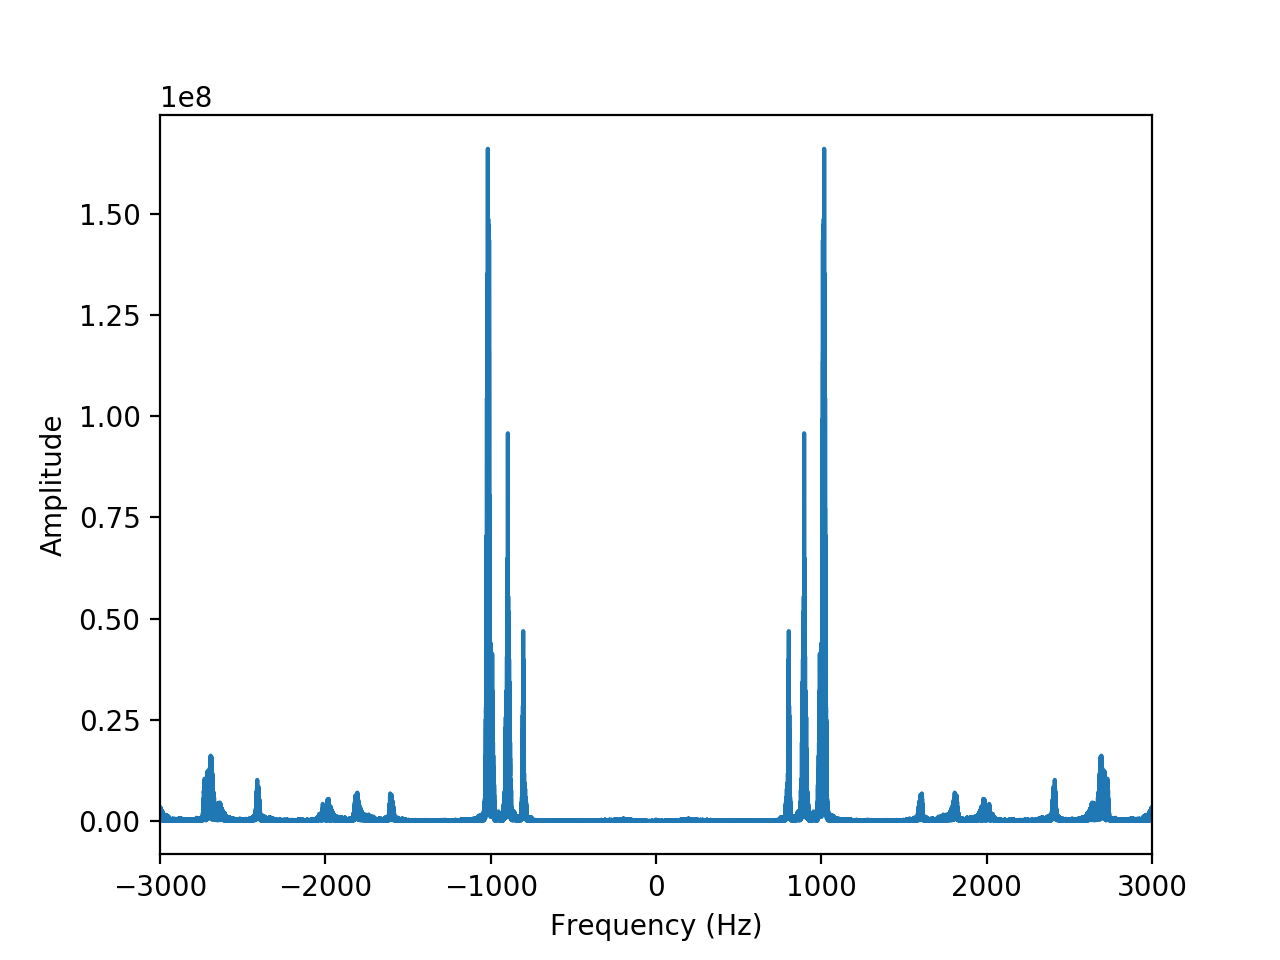

In [346]:
# Fourier modes
fm2 = (1.0/tm2[-1])*np.concatenate((np.arange(0, nm2/2), np.arange(-(nm2-1)/2, 0))) # frequency
fsm2 = np.fft.fftshift(fm2)

# Fourier Transform
ym2ft = np.fft.fft(ym2)
ym2fts = np.fft.fftshift(ym2ft)
plt.figure(14)
plt.plot(fsm2, abs(ym2fts))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim((-3000,3000))
plt.show()

In [123]:
# window functions
width = 0.15 # window width
gaussian = lambda x, x0: np.exp( -(x - x0)**2 / (2*width**2) ) # Gaussian

<IPython.core.display.Javascript object>


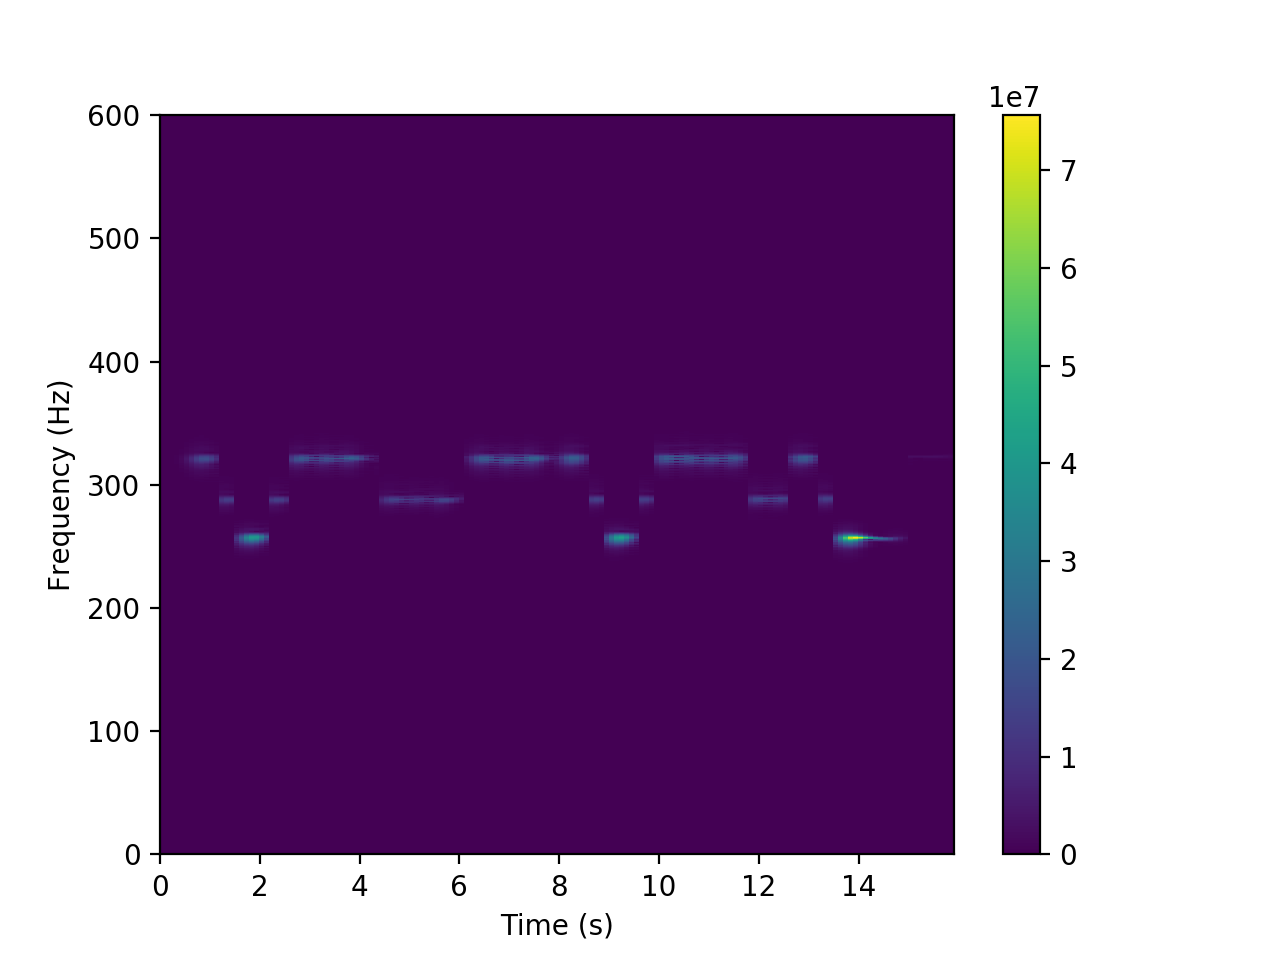

In [348]:
# gaussian wavelet w/ filtering overtones
# music 1
tg, fg, spc = gabor_transform(ym1, Fsm1, gaussian, window_num = 160, ffilter = True)
# plot spectrogram of music 1
plt.figure(15)
plt.pcolormesh(tg, fg, spc)
plt.ylim((0, 600))
#plt.title('Spectrogram of Music 1 w/o overtones')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar()
plt.show()

The frequency for three nodes played are about 316 Hz, 282 Hz, 251 Hz, respectively corresponding to E5 (329.63 Hz), D5 (293.66 Hz) and C5 (261.63 Hz). 

<IPython.core.display.Javascript object>


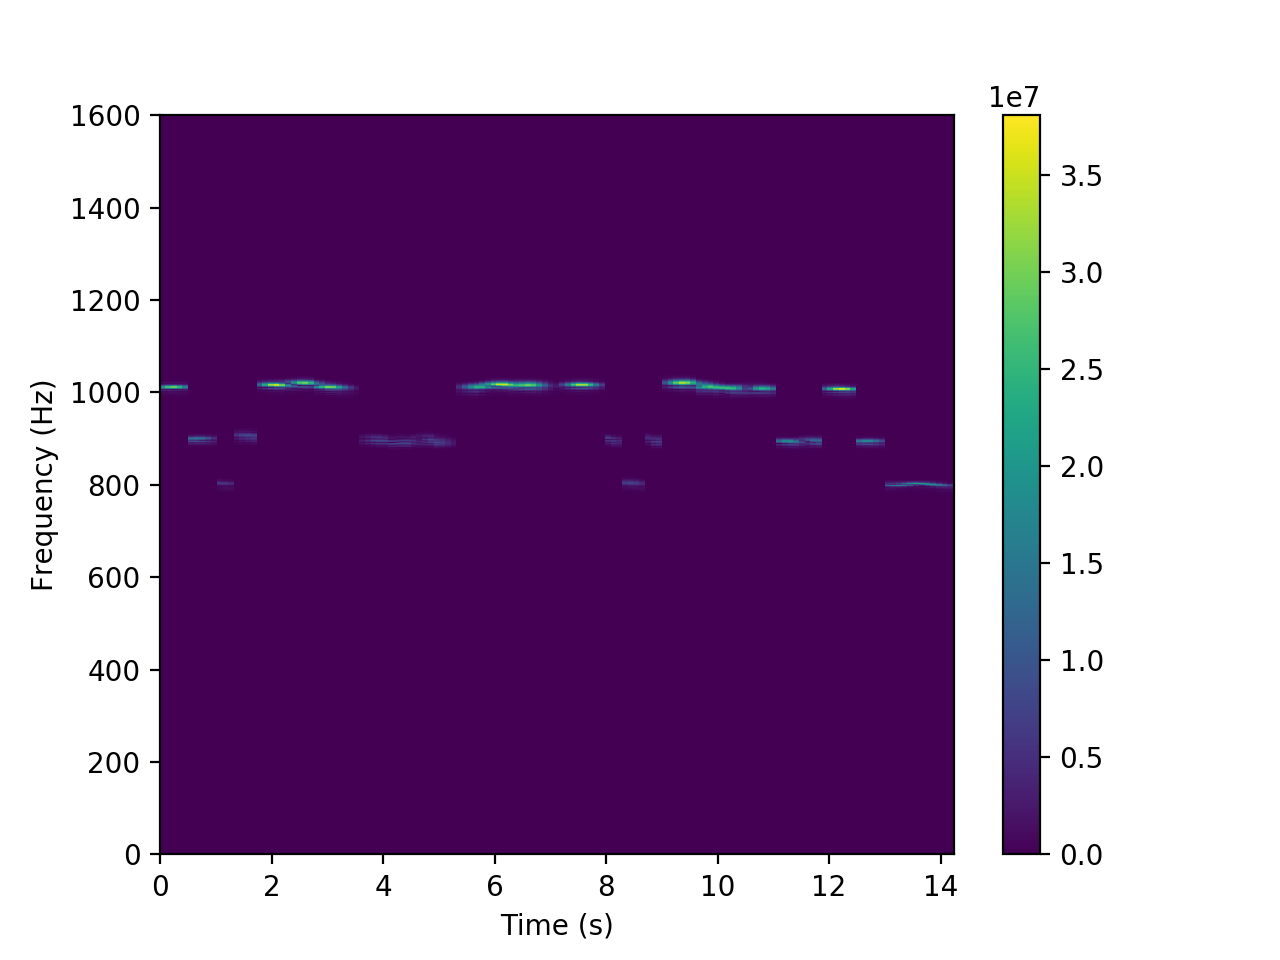

In [347]:
# gaussian wavelet w/ filtering overtones
# music 2
tg2, fg2, spc2 = gabor_transform(ym2, Fsm2, gaussian, window_num = 140, ffilter = True)
# plot spectrogram of music 2
plt.figure(17)
plt.pcolormesh(tg2, fg2, spc2)
plt.ylim((0, 1600))
#plt.title('Spectrogram of Music 2 w/o overtones')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


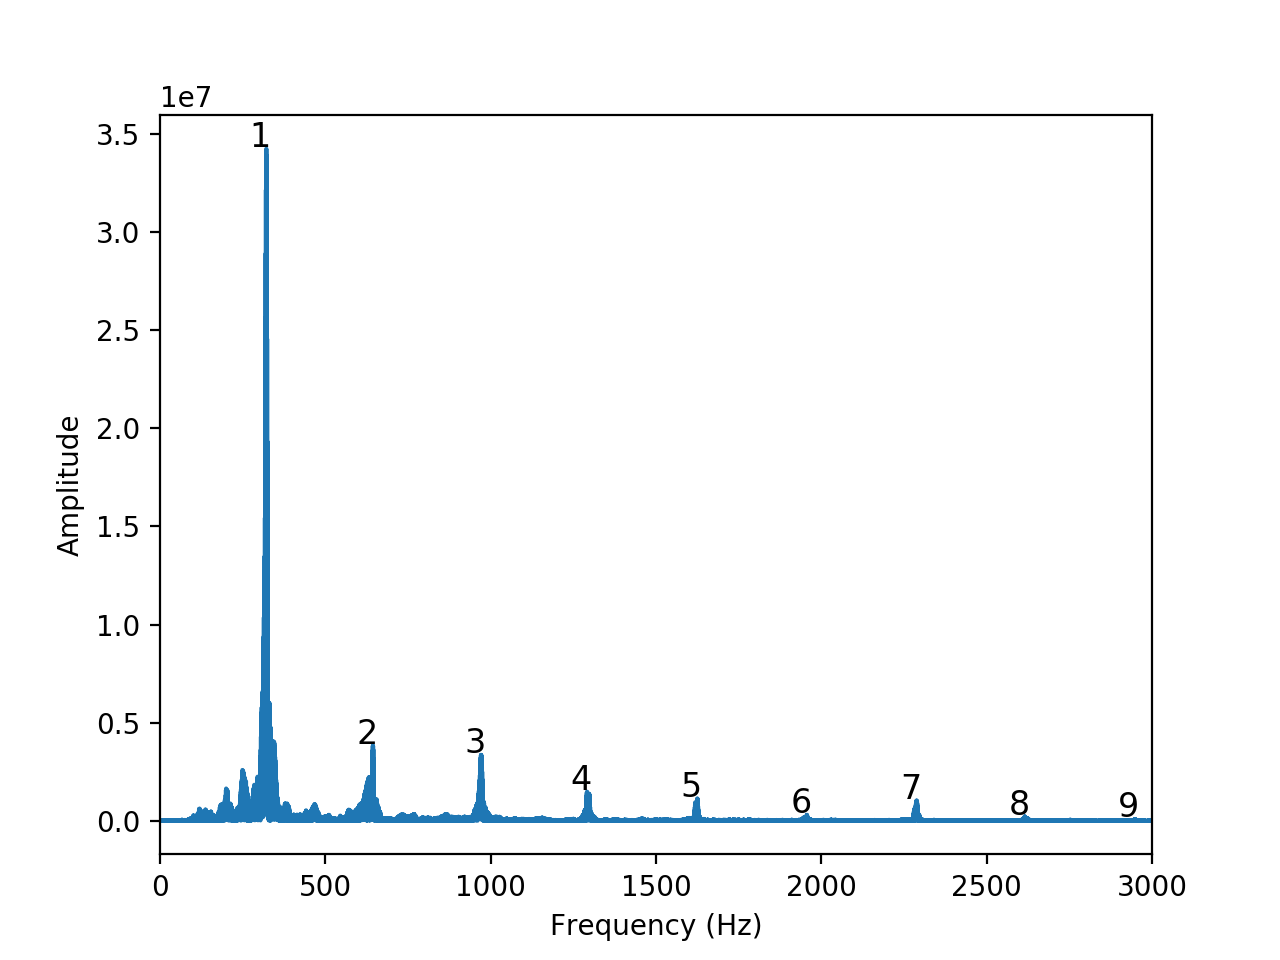

In [342]:
# plot overtones of piano
tg11, fg11, spc11 = gabor_transform(ym1, Fsm1, gaussian, window_num = 160)
plt.figure(104)
plt.plot(fg11[1::], spc11[:,8])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim((0,3000))

for j in range(9):
    j1 = j + 1
    label = '%d' % (j1)
    pos = spc11[(j*5100+2550):((j+1)*5100+2550),8].argmax()
    plt.text(fg11[pos+j*5100+2550]-50, spc11[pos+j*5100+2550,8]+1e5, label, fontsize=12)

plt.show()

<IPython.core.display.Javascript object>


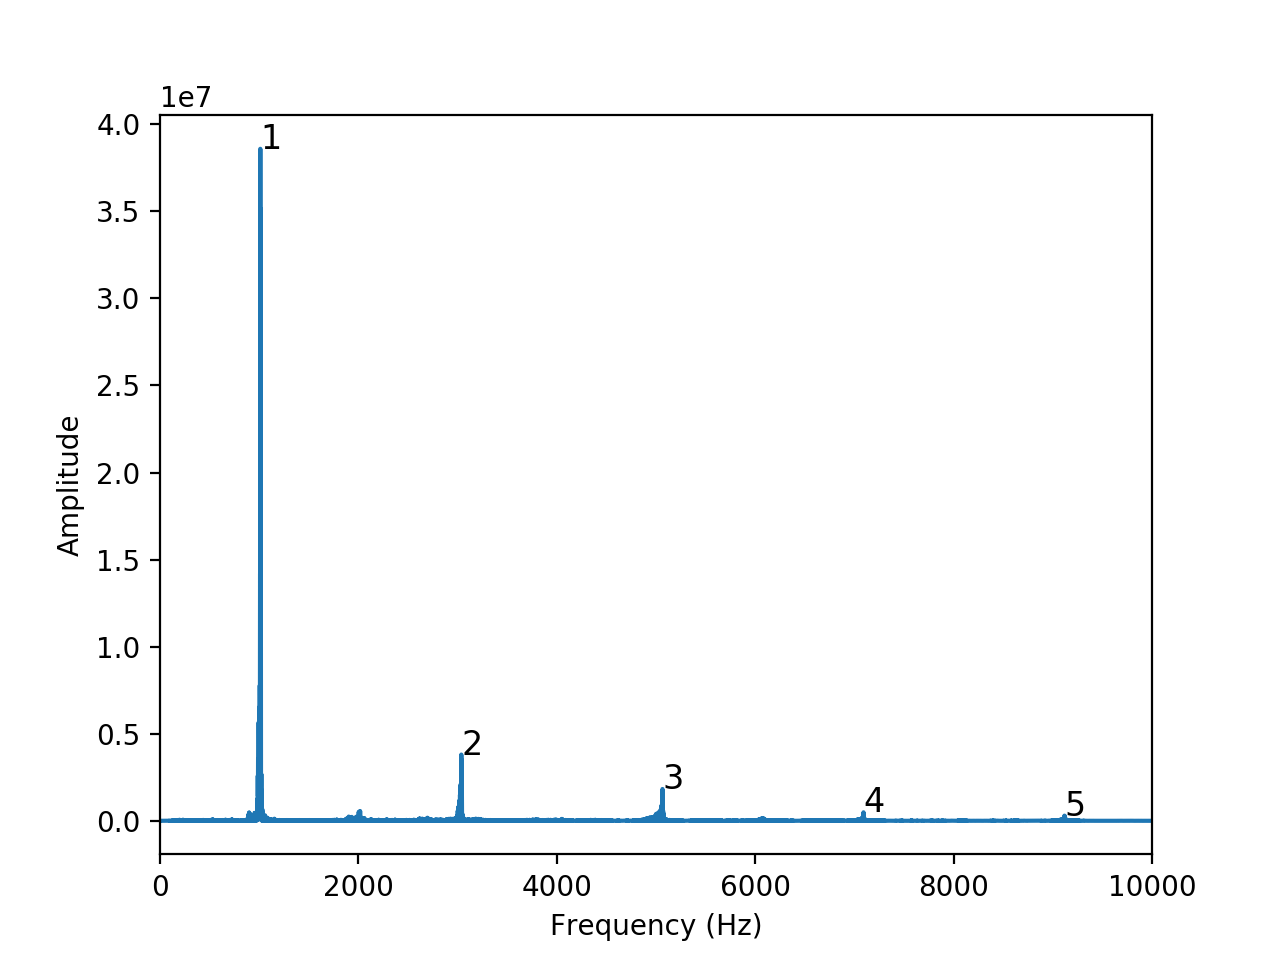

In [345]:
# plot overtones of recorder
tg22, fg22, spc22 = gabor_transform(ym2, Fsm2, gaussian, window_num = 140)
plt.figure(103)
plt.plot(fg22[1::], spc22[:,0])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim((0,10000))

for j in range(5):
    j1 = j + 1
    label = '%d' % (j1)
    pos = spc22[(j*28500):((j+1)*28500),0].argmax()
    plt.text(fg22[pos+1+j*28500], spc22[pos+j*28500,0], label, fontsize=12)

plt.show()

The frequency for three nodes played are about 1000 Hz, 880 Hz, 789 Hz, respectively corresponding to B5 (987.77 Hz), A5(880.00 Hz) and G5 (783.99 Hz). 

In [192]:
from mingus.containers import Bar, Track
import mingus.extra.lilypond as lilypond

# music 2

b1 = Bar()
b1 + "B-5"
b1 + "A-5"
b1 + "G-5"
b1 + "A-5"

b2 = Bar()
b2 + "B-5"
b2 + "B-5"
b2 + "B-5"
b2 + None

b3 = Bar()
b3 + "A-5"
b3 + "A-5"
b3 + "A-5"
b3 + None

b4 = Bar()
b4 + "B-5"
b4 + "B-5"
b4 + "B-5"
b4 + None

b5 = Bar()
b5 + "B-5"
b5 + "A-5"
b5 + "G-5"
b5 + "A-5"

b6 = Bar()
b6 + "B-5"
b6 + "B-5"
b6 + "B-5"
b6 + "B-5"

b7 = Bar()
b7 + "A-5"
b7 + "A-5"
b7 + "B-5"
b7 + "A-5"

b8 = Bar()
b8 + "G-5"

t = Track()
t + b1
t + b2
t + b3
t + b4
t + b5
t + b6
t + b7
t + b8

bar = lilypond.from_Track(t)
#lilypond.to_pdf(bar, "my_first_bar") # failed
# manually save to pdf
f = open('music2score.ly', 'w')
f.write(bar)
f.close()
# then execute 'lilypond -fpdf -o "musicscore" "musicscore.ly"'' in command line

In [191]:
# music 1

b1p = Bar()
b1p + "E-4"
b1p + "D-4"
b1p + "C-4"
b1p + "D-4"

b2p = Bar()
b2p + "E-4"
b2p + "E-4"
b2p + "E-4"
b2p + None

b3p = Bar()
b3p + "D-4"
b3p + "D-4"
b3p + "D-4"
b3p + None

b4p = Bar()
b4p + "E-4"
b4p + "E-4"
b4p + "E-4"
b4p + None

b5p = Bar()
b5p + "E-4"
b5p + "D-4"
b5p + "C-4"
b5p + "D-4"

b6p = Bar()
b6p + "E-4"
b6p + "E-4"
b6p + "E-4"
b6p + "E-4"

b7p = Bar()
b7p + "D-4"
b7p + "D-4"
b7p + "E-4"
b7p + "D-4"

b8p = Bar()
b8p + "C-4"

tp = Track()
tp + b1p
tp + b2p
tp + b3p
tp + b4p
tp + b5p
tp + b6p
tp + b7p
tp + b8p

barp = lilypond.from_Track(tp)
#lilypond.to_pdf(bar, "my_first_bar") # failed
# manually save to pdf
f = open('music1score.ly', 'w')
f.write(barp)
f.close()
# then execute 'lilypond -fpdf -o "musicscore" "musicscore.ly"'' in command line